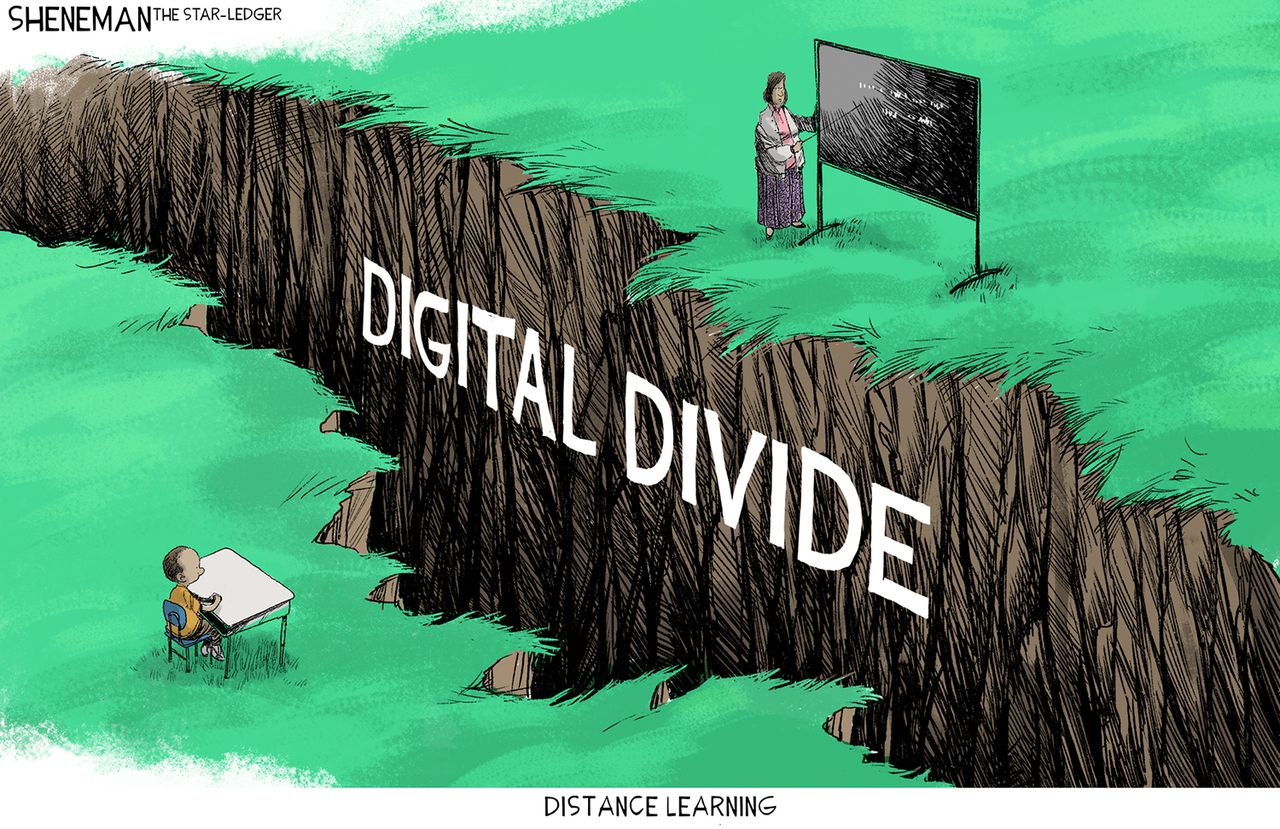

# **Digital Divide**
---
The Digital Divide refers to the gap between those able to benefit from the internet and those who are not.      
Though originally coined to refer merely to the matter of access—who is connected to the internet and isn't, the term has evolved to focus on the division between those who are benefited by the internet and those who are not. Thus, the aim of “closing the digital divide” now refers not only to efforts to provide meaningful access to internet infrastructures, applications and services, but it also includes the matter of how emergent technologies such as Artificial Intelligence, robotics and the internet of things can help societies.(Wikipedia).

#**Purpose**

---
We want to make students aware of the digital divide by examining and looking at their own area's data.  Then to propose ways in which they can improve the situation.


#**Objectives:**

---
Students will be able to:

*   Analize Big Data
*   Use Techniques and Tools for Data Transformation
*   Create Data Visualizations







#**Related Articles**:


*   PBS.org:   
https://www.pbs.org/video/eliminating-digital-divide-ihdcln/
*   Pew Reserch Center:    
https://www.pewresearch.org/internet/fact-sheet/internet-broadband/
*   Pewtrusts.org:    
https://www.pewtrusts.org/en/trust/archive/summer-2019/americas-digital-divide
*   Standford Education:    
https://cs.stanford.edu/people/eroberts/cs181/projects/digital-divide/start.html
*   TIA:    
https://www.ntia.doc.gov/blog/2020/ntia-data-reveal-shifts-technology-use-persistent-digital-divide
*   World Economic Forum:    
https://www.weforum.org/agenda/2019/05/digital-divide-persists-even-as-lower-income-americans-make-gains-in-tech-adoption.

---








# **Data**

Our data was downloaded from NYC Open Data.  The specific data file is provided below, but any of their data files could be used.  The API link, where the actual downloadd file was found, is also provided below.  The file was a .json file which we converted to csv using the conversion site linked below.  Finally, the csv file was downloaded.


---
NYC Open Data: https://opendata.cityofnewyork.us/

---
Internet Master Plan: Adoption and Infrastructure Data by Neighborhood


https://data.cityofnewyork.us/browse?category=City+Government&q=internet

---
API:
https://dev.socrata.com/foundry/data.cityofnewyork.us/fg5j-q5nk

---
---
Conversion to CSV:
https://json-csv.com/

---





#**Seaborn Tutorial**
We use seaborn to easily plot the data, this is a link to a simple seaborn tutorial.

---

https://elitedatascience.com/python-seaborn-tutorial

---



#**Code**

In [ ]:
# these are the imports used in the code below
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
#here we are specifically importing the file
import io
from google.colab import files 
  
# upload the data file, choosing from your computer
data = files.upload()

In [ ]:
"""
If you want your students to just upload from Google Drive (so they do not have to download)
you can upload to your drive, share and have them copy it and use the commands below to get the data  
from their drive
"""
# dataset=pd.read_csv("drive/Colab_Notebooks/db.csv")

In [ ]:
# make a data frame
data_df = pd.read_csv(io.BytesIO(data['DigDiv.csv'])) 
# look at the first few data entries, five by default.  You can use a parameter to alter that, e.g. head(10)
display(data_df.head())
# Information about size and general statistical characteristics (not really needed in this case)
data_df.describe()

,neighborhood_tabulation_area,neighborhood_tabulation_area_1,borough_name,total_population,population_density_per_sq,total_number_of_households,area_sq_mi,street_mileage,home_broadband_adoption,home_broadband_adoption_by,mobile_broadband_adoption,mobile_broadband_adoption_1,mobile_dependent_households,mobile_dependent_households_1,residential_broadband_choice,residential_broadband_choice_1,commercial_fiber_isp_choice,commercial_fiber_choice,commercial_fiber_max_isp,commercial_fiber_max_isp_1,percentage_of_blocks_without,percentage_of_blocks_without_1,percentage_of_blocks_with,percentage_of_blocks_with_1,number_of_public_computer,public_wi_fi_in_nyc_count,number_of_free_public_wi,available_free_public_wi,estimated_number_of_businesses,number_of_households,total_accounts,account_density,account_density_quartile,population_projections_2050,households_receiving_benefits,estimated_lifeline_eligible,supportive_housing_nycdhs,low_income_housing_nycha,presence_of_ibzs,number_of_nycha_buildings,number_of_public_schools,number_of_dcas_buildings,number_of_nyc_h_h_buildings,city_buildings_with_high,street_furniture_fdny_call,street_furniture_parking,street_furniture_bus_stop,street_furniture_bike_shelters,street_furniture_city_benches,linknyc_kiosks,walknyc_sign_locations,poles_reserved_by_mobile,pole_with_equipment_installed,density_of_poles_reserved,mobile_telecom_franchise,empire_city_subway_coverage,empire_city_subway_coverage_1,percentage_of_households,number_of_fixed_wireless,estimated_aerial_plant,estimated_underground_plant,geographic_variations_in,estimated_underground_utility,utility_pole_make_ready,utility_pole_make_ready_1,nyc_internet_master_plan,nyc_internet_master_plan_1,fiber_drops_estimated_relative,indoor_cabling_for_multiple,optimal_for_unlicensed,percentage_optimal_for,estimated_number_of_radio,estimated_number_of_radio_1,sample_of_nta_field_surveyed,reviewed_for_underground,reviewed_for_aerial_fiber,reviewed_for_millimeter_wave,field_survey_findings
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,24140,67407.17,11115,0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,27,17,True,3097.0,11115.0,14212.0,748.0,High,25509.0,42.0,225.0,0.0,0.0,False,0.0,1.0,4.0,0.0,High,45.0,65.0,6.0,0.0,10.0,5.0,0,6.0,19.0,1.32,High,0.0,NaN,0.25,2.0,0.00,0.88,Underground Network Areas,High,4.5,High,1.22,Medium High,High,Low,YES,0.37,174.0,39.0,NO,NO,NO,NO,NONE
1,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,Brooklyn,66293,29178.73,26150,2.27,80,0.74,Medium High,0.62,Low,0.04,Medium Low,1.8,Low,1.1,Low,3,Medium High,0.19,Medium High,0.99,0.76,3,18,0,False,2474.0,26150.0,28624.0,358.0,Medium Low,71948.0,711.0,3976.0,0.0,2204.0,False,7.0,13.0,12.0,0.0,High,77.0,122.0,35.0,0.0,7.0,0.0,4,11.0,23.0,0.43,Medium Low,0.0,NaN,1.00,1.0,0.96,0.53,Above and Underground Network,Average,4.0,Average,2.45,High,Average,Average,YES,0.25,86.0,29.0,NO,NO,NO,NO,NONE
2,BK19,Brighton Beach,Brooklyn,34157,55432.80,14557,0.62,23,0.62,Low,0.52,Low,0.04,Medium Low,1.8,Low,1.3,Medium-Low,3,Medium High,0.19,Medium High,0.99,0.76,3,1,0,False,2651.0,14557.0,17208.0,748.0,High,39608.0,523.0,2819.0,0.0,0.0,False,0.0,5.0,2.0,1.0,Medium Low,33.0,94.0,14.0,0.0,4.0,0.0,6,7.0,5.0,0.52,Medium Low,0.0,NaN,0.97,1.0,0.59,0.83,Above and Underground Network,High,4.5,High,1.43,High,High,Low,YES,0.62,56.0,8.0,NO,NO,NO,NO,NONE
3,BK21,Seagate-Coney Island,Brooklyn,29677,21334.49,11236,1.39,25,0.59,Low,0.54,Low,0.06,High,1.8,Low,1.2,Low,3,Medium High,0.20,Medium High,0.99,0.76,5,32,0,False,771.0,11236.0,12007.0,480.0,Medium High,40788.0,748.0,2980.0,116.0,4098.0,False,9.0,5.0,9.0,0.0,Low,31.0,38.0,15.0,0.0,10.0,0.0,4,13.0,4.0,0.68,Medium High,0.0,NaN,1.00,2.0,0.63,0.42,Above and Underground Network,Average,4.5,High,1.00,Medium High,Average,Average,YES,0.36,82.0,0.0,YES,NO,YES,YES,Low make-ready requirements. Some locations ha...
4,BK23,West Brighton,Brooklyn,15754,50261.26,8401,0.31,12,0.61,Low,0.54,Low,0.05,Medium High,1.4,Low,1.5,Medium-High,3,

,total_population,population_density_per_sq,total_number_of_households,area_sq_mi,street_mileage,home_broadband_adoption,mobile_broadband_adoption,mobile_dependent_households,residential_broadband_choice,commercial_fiber_isp_choice,commercial_fiber_max_isp,percentage_of_blocks_without,percentage_of_blocks_with,percentage_of_blocks_with_1,number_of_public_computer,public_wi_fi_in_nyc_count,number_of_free_public_wi,estimated_number_of_businesses,number_of_households,total_accounts,account_density,population_projections_2050,households_receiving_benefits,estimated_lifeline_eligible,supportive_housing_nycdhs,low_income_housing_nycha,number_of_nycha_buildings,number_of_public_schools,number_of_dcas_buildings,number_of_nyc_h_h_buildings,street_furniture_fdny_call,street_furniture_parking,street_furniture_bus_stop,street_furniture_bike_shelters,street_furniture_city_benches,linknyc_kiosks,walknyc_sign_locations,poles_reserved_by_mobile,pole_with_equipment_installed,density_of_poles_reserved,empire_city_subway_coverage,percentage_of_households,number_of_fixed_wireless,estimated_aerial_plant,estimated_underground_plant,utility_pole_make_ready,nyc_internet_master_plan,percentage_optimal_for,estimated_number_of_radio,estimated_number_of_radio_1
count,195.000000,194.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,195.000000,194.000000,194.000000,194.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,43420.728205,44394.961598,16114.897436,1.550462,45.784615,0.686769,0.695333,0.054769,2.231795,1.600513,3.389744,0.161179,0.970615,0.882000,2.287179,17.020513,11.138462,1300.835106,16711.627660,18012.462766,489.957447,48570.005319,697.686170,2694.175532,55.845745,1032.292553,2.840426,9.648936,7.404255,0.212766,82.845745,78.335106,17.787234,0.101064,8.526596,9.500000,3.712821,8.871134,25.211340,0.882990,0.137553,0.758191,1.473404,0.613830,0.630851,3.984043,1.000000,0.295644,106.861702,19.781915
std,23035.027599,29891.716210,9698.610950,1.601473,26.090935,0.139204,0.125251,0.028670,0.644176,0.801255,1.918950,0.177550,0.121182,0.210837,1.778911,26.971149,23.726672,1004.630679,9323.807056,9729.445275,313.190991,23897.626296,567.275751,2041.416281,149.988102,1991.176310,5.172538,6.900682,7.006978,0.618301,42.052204,93.527196,10.622217,0.351314,8.418488,20.115309,7.333695,8.850450,28.681233,0.821633,0.259912,0.309994,0.769982,0.400918,0.399053,0.613799,0.812543,0.281703,91.680345,18.962961
min,0.000000,0.000000,0.000000,0.200000,8.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.070000,0.020000,0.000000,0.000000,0.000000,150.000000,5667.000000,6203.000000,94.000000,13957.000000,25.000000,129.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,3.000000,0.090000,0.000000,15.000000,0.000000
25%,27034.500000,19664.500000,9482.000000,0.700000,29.000000,0.630000,0.670000,0.040000,1.800000,1.200000,2.000000,0.050000,0.990000,0.850000,1.000000,1.000000,0.000000,674.750000,10129.000000,10916.250000,247.750000,30901.250000,244.750000,1063.750000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,49.000000,25.750000,10.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.420000,0.000000,0.510000,1.000000,0.125000,0.225000,3.000000,0.257500,0.050000,53.000000,4.000000
50%,38655.000000,38567.595000,13780.000000,1.170000,42.000000,0.710000,0.710000,0.050000,2.000000,1.300000,3.000000,0.120000,1.000000,0.990000,2.000000,7.000000,0.000000,932.500000,14478.500000,15494.000000,442.500000,43278.5

In [ ]:
# after examining the many columns, we chose those we wanted to examine
col_list = ["borough_name", "percentage_of_blocks_without", "percentage_of_blocks_with", "households_receiving_benefits", "estimated_lifeline_eligible", "low_income_housing_nycha", "account_density"]

"""
Make calculations from existing columns and create a new column
"""
#data_df["low_income"] = data_df["households_receiving_benefits"] + data_df["estimated_lifeline_eligible"] + data_df["low_income_housing_nycha"]
"""
Sort by values:
Sort by account_density, then by percentage_blocks_without
"""
#data_df = data_df.sort_values(by = ['account_desnsity', 'percentage_blocks_without'])
"""
Group by.  This makes more sense after filtering.
You may use max(), min(), mean(), etc...
"""
#boroughs_df = data_df.groupby(by="borough_name").max()

# by creating a new data frame, we keep all our original data, just in case we later decide we want to look at something else
filtered_df = pd.read_csv("DigDiv.csv", usecols=col_list)
filtered_df.head()

,borough_name,percentage_of_blocks_without,percentage_of_blocks_with,account_density,households_receiving_benefits,estimated_lifeline_eligible,low_income_housing_nycha
0,Brooklyn,0.27,1.00,748.0,42.0,225.0,0.0
1,Brooklyn,0.19,0.99,358.0,711.0,3976.0,2204.0
2,Brooklyn,0.19,0.99,748.0,523.0,2819.0,0.0
3,Brooklyn,0.20,0.99,480.0,748.0,2980.0,4098.0
4,Brooklyn,0.33,1.00,760.0,245.0,846.0,0.0


In [ ]:
# here we filered all of Brooklyn's data
Brooklyn_df = filtered_df[ filtered_df["borough_name"] == "Brooklyn" ]
Brooklyn_df.head()

,borough_name,percentage_of_blocks_without,percentage_of_blocks_with,account_density,households_receiving_benefits,estimated_lifeline_eligible,low_income_housing_nycha
0,Brooklyn,0.27,1.00,748.0,42.0,225.0,0.0
1,Brooklyn,0.19,0.99,358.0,711.0,3976.0,2204.0
2,Brooklyn,0.19,0.99,748.0,523.0,2819.0,0.0
3,Brooklyn,0.20,0.99,480.0,748.0,2980.0,4098.0
4,Brooklyn,0.33,1.00,760.0,245.0,846.0,0.0


In [ ]:
# here we filered all of State Island's data
StatenIsland_df = filtered_df[ filtered_df["borough_name"] == "Staten Island" ]
StatenIsland_df.head()

,borough_name,percentage_of_blocks_without,percentage_of_blocks_with,account_density,households_receiving_benefits,estimated_lifeline_eligible,low_income_housing_nycha
176,Staten Island,0.15,0.98,109.0,153.0,610.0,0.0
177,Staten Island,0.31,0.84,94.0,364.0,1328.0,502.0
178,Staten Island,0.02,1.00,153.0,92.0,546.0,0.0
179,Staten Island,0.09,1.00,256.0,489.0,1256.0,0.0
180,Staten Island,0.18,0.95,106.0,125.0,680.0,0.0


In [ ]:
# here we filered all of Bronx's data
Bronx_df = filtered_df[ filtered_df["borough_name"] == "Bronx" ]
Bronx_df.head()

,borough_name,percentage_of_blocks_without,percentage_of_blocks_with,account_density,households_receiving_benefits,estimated_lifeline_eligible,low_income_housing_nycha
51,Bronx,0.14,1.0,437.0,1508.0,4760.0,4445.0
52,Bronx,0.13,1.0,267.0,608.0,1881.0,4960.0
53,Bronx,0.10,1.0,886.0,1396.0,5394.0,0.0
54,Bronx,0.17,1.0,489.0,998.0,3156.0,0.0
55,Bronx,0.05,1.0,798.0,967.0,3234.0,2380.0


In [ ]:
# here we filered all of Queen's data
Queens_df = filtered_df[ filtered_df["borough_name"] == "Queens" ]
Queens_df.head()

,borough_name,percentage_of_blocks_without,percentage_of_blocks_with,account_density,households_receiving_benefits,estimated_lifeline_eligible,low_income_housing_nycha
118,Queens,0.07,1.00,257.0,923.0,2376.0,2096.0
119,Queens,0.05,1.00,365.0,222.0,799.0,0.0
120,Queens,0.22,0.96,98.0,250.0,602.0,0.0
121,Queens,0.11,0.98,136.0,333.0,585.0,0.0
122,Queens,0.12,1.00,199.0,167.0,704.0,0.0


In [ ]:
# here we filered all of Manhattan's data
Manhattan_df = filtered_df[ filtered_df["borough_name"] == "Manhattan" ]
Manhattan_df.head()

,borough_name,percentage_of_blocks_without,percentage_of_blocks_with,account_density,households_receiving_benefits,estimated_lifeline_eligible,low_income_housing_nycha
89,Manhattan,0.0,1.0,1017.0,631.0,4485.0,4531.0
90,Manhattan,0.0,1.0,850.0,2502.0,6641.0,9494.0
91,Manhattan,0.0,1.0,779.0,748.0,3191.0,168.0
92,Manhattan,0.0,1.0,551.0,380.0,2202.0,1369.0
93,Manhattan,0.0,1.0,596.0,270.0,1774.0,1940.0


Text(0.5, 1.0, 'Digital Divide')

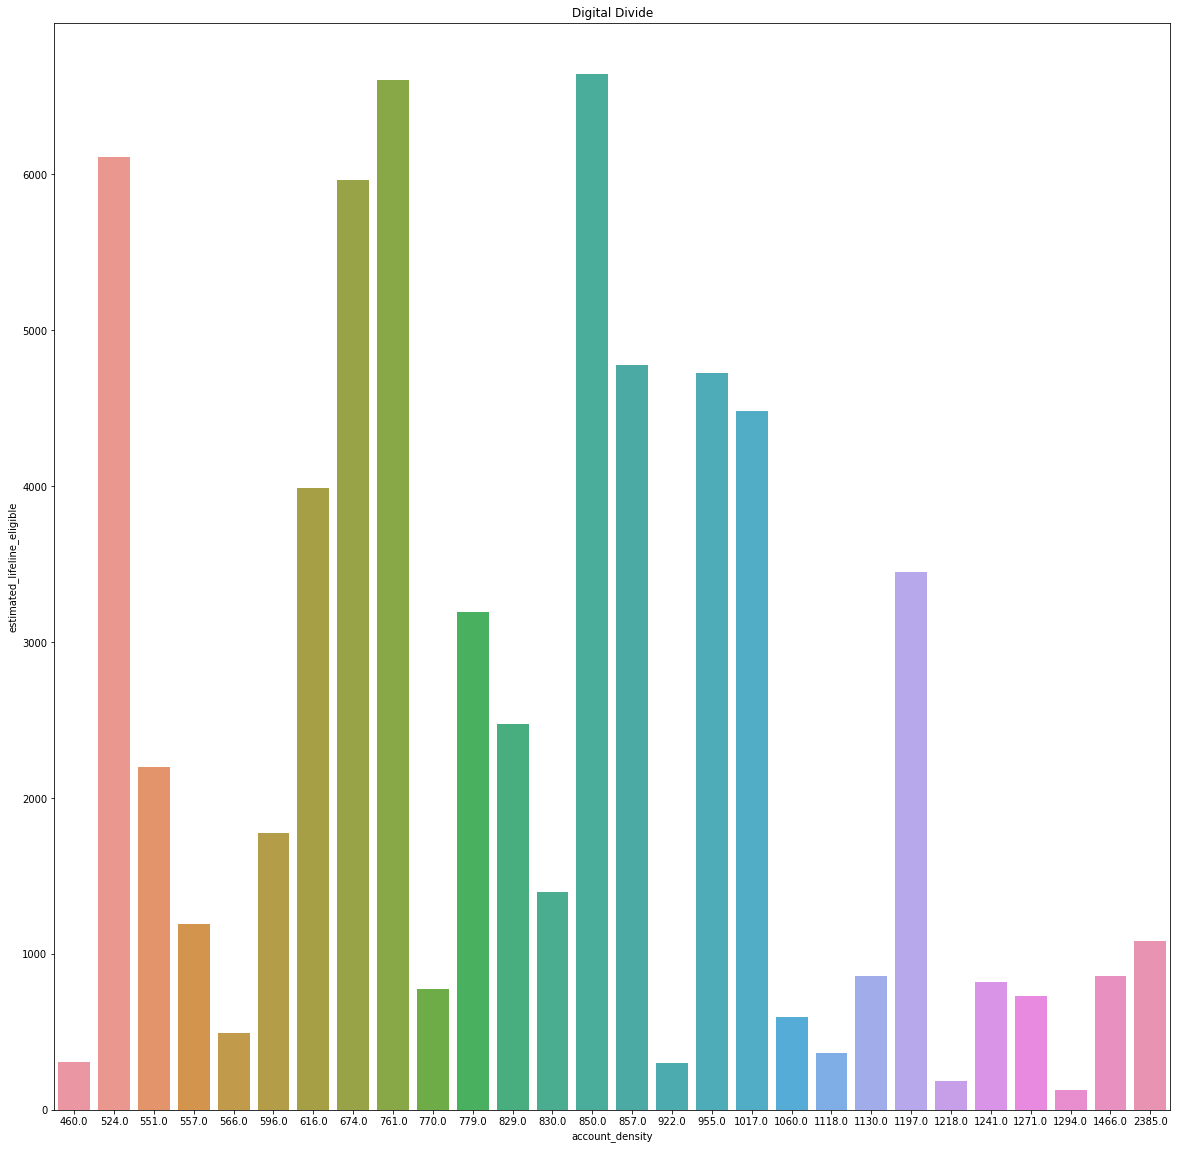

In [ ]:
# now we set the figure's size.  The dfault is very small
plt.figure(figsize=(20,20))

# now we plot the Manhattan data, deciding the x and y axis we want to look at. You can easily change the type of plot
sns.barplot(x="account_density", y="estimated_lifeline_eligible", hue=None, data=Manhattan_df).set_title("Digital Divide")

Text(0.5, 1.0, 'Digital Divide')

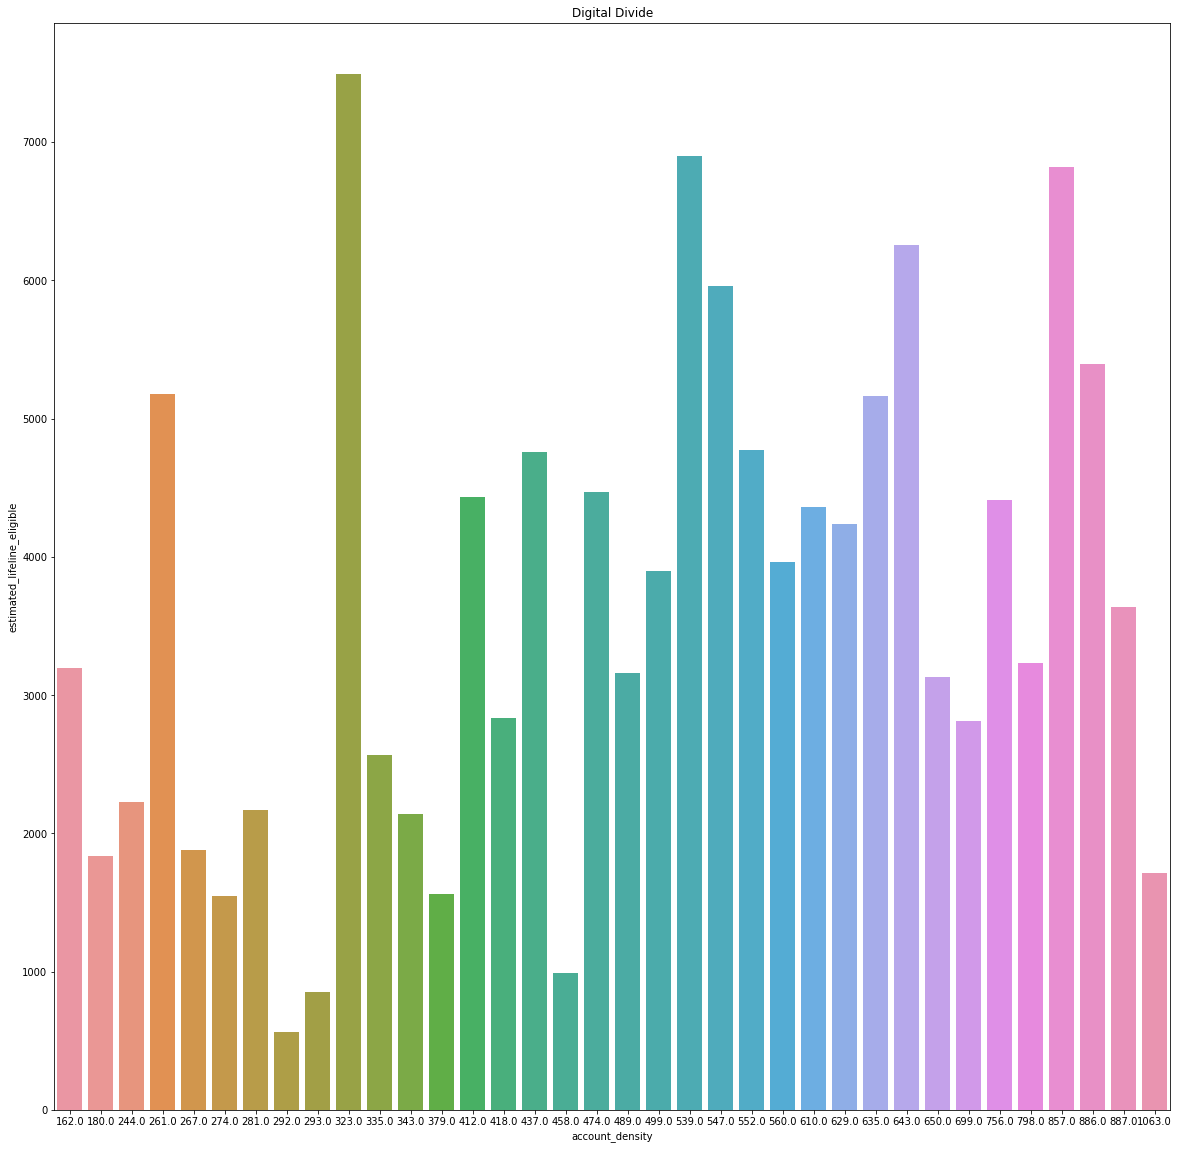

In [ ]:
# here is the same graph, but for the Bronx
plt.figure(figsize=(20,20))
sns.barplot(x="account_density", y="estimated_lifeline_eligible", hue=None, data=Bronx_df).set_title("Digital Divide")

#**Next** **Steps:**

---
Why is it different for different Boroughs?


















#**Standards (CSTA)**:
---
2-DA-08: 6-8	Collect data using computational tools and transform the data to make it more useful and reliable. Data & Analysis Collection Visualization & Transformation Testing    

---
3A-DA-11	9-10 Create interactive data visualizations using software tools to help others better understand real-world phenomena.

---

3B-DA-05 11-12	Use data analysis tools and techniques to identify patterns in data representing complex systems. Data & Analysis	Collection Visualization & Transformation	Abstraction      
3B-DA-06 11-12	Select data collection tools and techniques to generate data sets that support a claim or communicate information.
Data & Analysis	Collection Visualization & Transformation	Communicating

---
3B-IC-26	11-12	Evaluate the impact of equity, access, and influence on the distribution of computing resources in a global society.    
Practice(s): Fostering an Inclusive Computing Culture: 1.2
Impacts of Computing	Culture	Inclusion

---




#**Additional articles to offer more solutions**


*   Disconnected: How the Digital Divide Harms Workers and What We Can Do about 
It   
https://thenext100.org/disconnected-how-the-digital-divide-harms-workers-and-what-we-can-do-about-it/?gclid=Cj0KCQiAzsz-BRCCARIsANotFgPJoqlfDB--edmTvH9gMGkEFTAZ1gpILluk5P77m7BTRbdaGc2pJysaAic2EALw_wcB
*   Power Up! / Helping to Close the Digital Divide   
http://www.ascd.org/publications/educational-leadership/feb15/vol72/num05/Helping-to-Close-the-Digital-Divide.aspx

*   A Capitalist Fix to the Digital Divide   
https://www.nytimes.com/2020/09/22/technology/digital-divide-solutions.html
*   Resources for Closing the Digital Divide   
https://www.edutopia.org/digital-divide-technology-access-resources
*   5 Insights for How to Tackle the Digital Divide During the Coronavirus and Beyond   
https://www.edweek.org/technology/5-insights-for-how-to-tackle-the-digital-divide-during-the-coronavirus-and-beyond/2020/04
*   Here are solutions to close the digital divide and give our students a chance   
https://calmatters.org/commentary/my-turn/2020/10/here-are-solutions-to-close-the-digital-divide-and-give-our-students-a-chance/









#**Call to Action**

---
What can we do to improve the digital divide?   
Join the Digital Diide Council:    
 http://www.digitaldividecouncil.com/top-five-digital-divide-solutions/

---

# **Top Five Solutions**  


1.   **Increase affordability** - Learn to fix smartphones and reuse parts.  You can help friends and family affordably access technology. 
2.   **Empowering users** - Teach friends and familily about how to take advantage of what technology and the internet have to offer.
1.   **Improve the relevance of online content** - Learn to provide content for small businesses around your neighborhood who may lask an internet presence.  
2.   **Internet infrastructure development** - Become an expert in technology so you can take it to areas where it is not currently avilable, or become a voice for those who do not have access.
1.   **Address gender gap in internet access** - make sure all you female friends and family know how to use the internet.  Become an advocate for those in underdeveloped countries who may not have access.

---